<a href="https://colab.research.google.com/github/savindumahasen/Chatbot/blob/main/chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chatbot with Lang-graph

In [1]:
!pip install langgraph langsmith
!pip install langchain langchain_groq langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.44
    Uninstalling langsmith-0.3.44:
      Su

In [2]:
## Use Groq and Lang smith API keys
from google.colab import userdata
groq_api_key=userdata.get('GROQ_API_KEY')
langsmith_api_key=userdata.get("LANG_SMITH_API_KEY")

In [3]:
## setup the  langsmith APi key
import os
os.environ["LANGCHAIN_API_KEY"]=langsmith_api_key
os.environ["LANCHAIN_TRACING_V2"]="true"
os.environ["LANCHAIN_PROJECT"]="chatbot"

In [4]:
from langchain_groq import ChatGroq
llm=ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7eb90aa8ddd0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7eb90a70eed0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Building the chatbot using Langgraph

In [5]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [15]:
!pip install arxiv wikipedia

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.8 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=587b48af9b34584267386ba7f385ae85eebc4a19613881b65ba722ef3ec2a51e
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=fe6bfe055852b475e575ce0ca89a7ec050333f642204c510a0ce6e76b4d640d4
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built wikipedia sgmllib3k


In [45]:
## working with third party tools

from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun


## Arxiv and Wikipedia tools

arxiv_wrapper=ArxivAPIWrapper(top_k_results=10, doc_content_chars_max=5000)
arxiv_tool=ArxivQueryRun(api_wrapper=arxiv_wrapper)

wikipedia_wrapper=WikipediaAPIWrapper(top_k_results=10, doc_content_chars_max=5000)
wikipedia_tool=WikipediaQueryRun(api_wrapper=wikipedia_wrapper)

In [46]:
wikipedia_tool.invoke("Who is shiva")

"Page: Shiva\nSummary: Shiva (; Sanskrit: शिव, lit.\u2009'The Auspicious One', IAST: Śiva [ɕɪʋɐ]), also known as Mahadeva (; Sanskrit: महादेव:, lit.\u2009'The Great God', IAST: Mahādevaḥ, [mɐɦaːd̪eːʋɐh]) and Hara, is one of the principal deities of Hinduism. He is the Supreme Being in Shaivism, one of the major traditions within Hinduism.\nShiva is known as The Destroyer within the Trimurti, the Hindu trinity which also includes Brahma and Vishnu. In the Shaivite tradition, Shiva is the Supreme Lord who creates, protects and transforms the universe. In the goddess-oriented Shakta tradition, the Supreme Goddess (Devi) is regarded as the energy and creative power (Shakti) and the equal complementary partner of Shiva. Shiva is one of the five equivalent deities in Panchayatana puja of the Smarta tradition of Hinduism.\nShiva has many aspects, benevolent as well as fearsome. In benevolent aspects, he is depicted as an omniscient yogi who lives an ascetic life on Kailasa as well as a househ

In [49]:
arxiv_tool.invoke("Computer vision")

"Published: 2019-05-20\nTitle: Implications of Computer Vision Driven Assistive Technologies Towards Individuals with Visual Impairment\nAuthors: Linda Wang, Alexander Wong\nSummary: Computer vision based technology is becoming ubiquitous in society. One\napplication area that has seen an increase in computer vision is assistive\ntechnologies, specifically for those with visual impairment. Research has shown\nthe ability of computer vision models to achieve tasks such provide scene\ncaptions, detect objects and recognize faces. Although assisting individuals\nwith visual impairment with these tasks increases their independence and\nautonomy, concerns over bias, privacy and potential usefulness arise. This\npaper addresses the positive and negative implications computer vision based\nassistive technologies have on individuals with visual impairment, as well as\nconsiderations for computer vision researchers and developers in order to\nmitigate the amount of negative implications.\n\nPub

In [6]:
## Build the graph

class State(TypedDict):
  ## Messages have type "list". The add_messages function
  ## In the annotation defines how  this state key should be updated
  ## in this case, append messages to the list rather than overwriting it
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)


In [7]:
graph_builder

In [8]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [9]:
graph_builder.add_node("chatbot", chatbot)
graph_builder

In [10]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot",END)

In [11]:
## compile the graph builder
graph=graph_builder.compile()

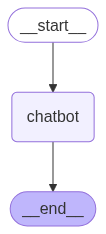

In [12]:
## display the graph

from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
## Test the bot with some user queries

In [14]:
while True:
  user_input=input("User ")
  if user_input.lower() in ["quit","buy"]:
    print("Good Buy")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    #print(event.values())
    for value in event.values():
      #print(value['messages'])
      print("Assistant:",value['messages'].content)

User Hi, I am Savindu Who are you
Assistant: Hello Savindu, I am Gemma, an open-weights AI assistant developed by the Gemma team at Google DeepMind. I'm here to help you with any questions you have or tasks you need assistance with.

What can I do for you today?

User buy
Good Buy
